# This Sheet will count province that was mention in description of each Government project.

### import the library 

In [1]:
import re
import string
from pythainlp import word_tokenize
from pythainlp.util import normalize
import csv
from collections import Counter
import matplotlib.pyplot as plt

### Def clean method

In [2]:
def clean_msg(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<.*?>', '', msg)

    # ลบ hashtag
    msg = re.sub(r'#', '', msg)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c), '', msg)

    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())

    return msg

### Open file that consist of lines of description text and create list to store all every time that each province was mention.

In [3]:
file = open("ITM_DES_DIS_ALL_202312281121.csv", "r", encoding="utf8")
reader = csv.reader(file)
data = list(reader)
# print(data[0])
word_province = []
provinces_thailand = [
    'กรุงเทพมหานคร', 'กระบี่', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร', 'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา',
    'ชลบุรี', 'ชัยนาท', 'ชัยภูมิ', 'ชุมพร', 'เชียงราย', 'เชียงใหม่', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก', 'นครปฐม',
    'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์', 'นนทบุรี', 'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์',
    'ปทุมธานี', 'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา', 'พังงา', 'พัทลุง', 'พิจิตร',
    'พิษณุโลก', 'เพชรบุรี', 'เพชรบูรณ์', 'แพร่', 'พะเยา', 'ภูเก็ต', 'ภูเพียง', 'มหาสารคาม', 'มุกดาหาร', 'แม่ฮ่องสอน',
    'ยโสธร', 'ยะลา', 'ร้อยเอ็ด', 'ระนอง', 'ระยอง', 'ราชบุรี', 'ลพบุรี', 'ลำปาง', 'ลำพูน', 'เลย', 'ศรีสะเกษ', 'สกลนคร',
    'สงขลา', 'สตูล', 'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร', 'สระแก้ว', 'สระบุรี', 'สิงห์บุรี', 'สุโขทัย',
    'สุพรรณบุรี',
    'สุราษฎร์ธานี', 'สุรินทร์', 'หนองคาย', 'หนองบัวลำภู', 'อ่างทอง', 'อำนาจเจริญ', 'อุดรธานี', 'อุทัยธานี', 'อุตรดิตถ์',
    'อุบลราชธานี', 'อ่าวนาง']

# n=1
with open('sum.txt', 'a', encoding="utf8") as sum, open('fail.txt', 'a', encoding="utf8") as fa:
    for i in data:
        normalization_word = normalize((i[0]).strip('\n'))
        clean_1 = clean_msg(normalization_word)
        word = word_tokenize(clean_1, keep_whitespace=False, engine='newmm')
        for o in word:
            if o in provinces_thailand:
                word_province.append(o)


file.close()

### Create dictionary for each province count.

In [4]:
highest_10 = []
k = Counter(word_province)
high = {}

# Finding 3 highest values
# high = k.most_common(10)

# print(k)
# print(high)

for i in k:
    if len(highest_10) < 11:
        highest_10.append(k[i])
    else:
        if min(highest_10) < k[i]:
            highest_10.remove(min(highest_10))
            highest_10.append(k[i])
         

for i in k:
    if k[i] in highest_10:
        high[i] = k[i]        

### Create bar chart.

<BarContainer object of 11 artists>

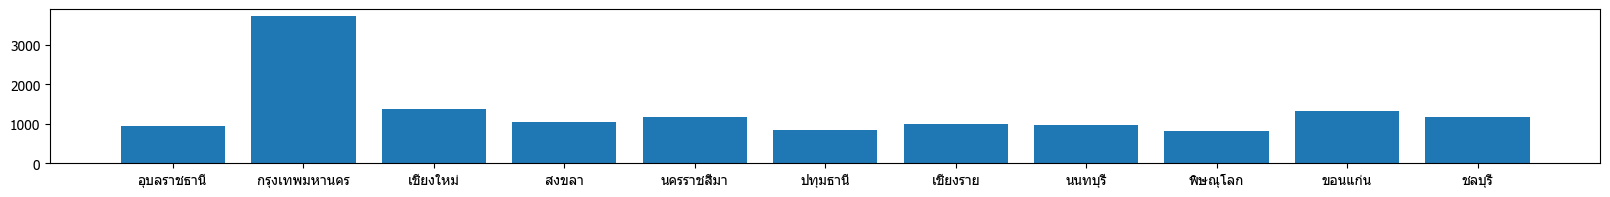

In [6]:
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
plt.rcParams['font.family'] = 'Tahoma'
plt.bar(high.keys(), high.values())